In [9]:
from IPython.display import Audio
import random
import pickle
import os
os.system("pip install kaggle")

import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import metrics
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

In [10]:
np.random.seed(100)
tf.random.set_seed(100)
random.seed(100)

pd.set_option('display.max_columns', 100)

In [11]:
SAMPLE_RATE = 16000
ACCEPTED_FORMATS = ["wav", "WAV"]

DURATION = 3
FRAME_LENGTH_DURATION_IN_MS = 25
FRAME_SKIP_DURATION_IN_MS = 12

N_FFT = 512
HOP_LENGTH = 256
N_MELS = 128

BATCH_SIZE = 8
EPOCHS = 100

DATA_PATH = "E:/Desktop/StutterDetModel/data"

(128, 188)


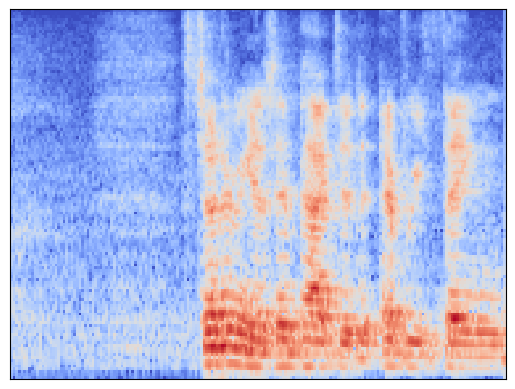

In [12]:
eg_audio = os.path.join(DATA_PATH, "clips/stuttering-clips/clips/FluencyBank_010_0.wav")
audio, sr = librosa.load(eg_audio, sr=16000)
mel_spec = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_fft=N_FFT,
    hop_length=HOP_LENGTH
)
mel_spec = librosa.power_to_db(mel_spec)
print(mel_spec.shape)
librosa.display.specshow(mel_spec)
Audio(audio, rate=sr)

(128, 188)


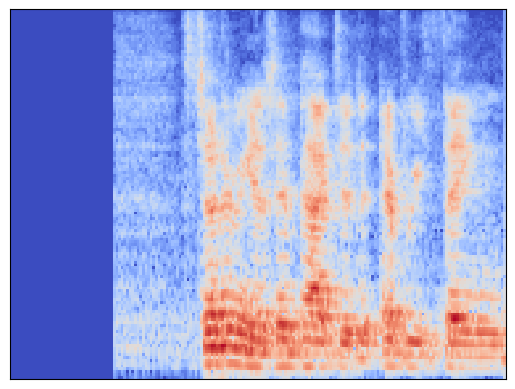

In [13]:
eg_audio = os.path.join(DATA_PATH, "clips/stuttering-clips/clips/FluencyBank_010_0.wav")
audio, sr = librosa.load(eg_audio, sr=16000)
audio[:10000] = 0
mel_spec = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_fft=N_FFT,
    hop_length=HOP_LENGTH,
    n_mels=N_MELS
)
mel_spec = librosa.power_to_db(mel_spec)
print(mel_spec.shape)
librosa.display.specshow(mel_spec, sr=sr)
Audio(audio, rate=sr)

(128, 188)


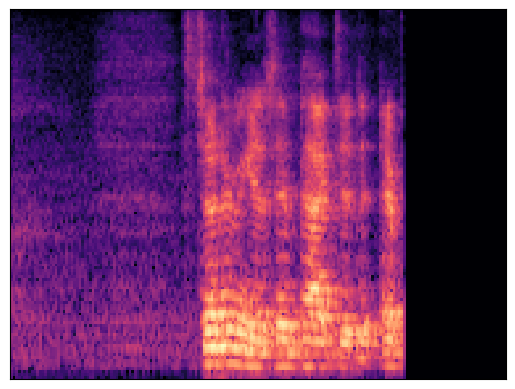

In [14]:
eg_audio = os.path.join(DATA_PATH, "clips/stuttering-clips/clips/FluencyBank_010_0.wav")
audio, sr = librosa.load(eg_audio, sr=16000)
audio[-10000:] = 0
mel_spec = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_fft=N_FFT,
    hop_length=HOP_LENGTH,
    n_mels=N_MELS
)
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
print(mel_spec.shape)
librosa.display.specshow(mel_spec, sr=sr)
Audio(audio, rate=sr)

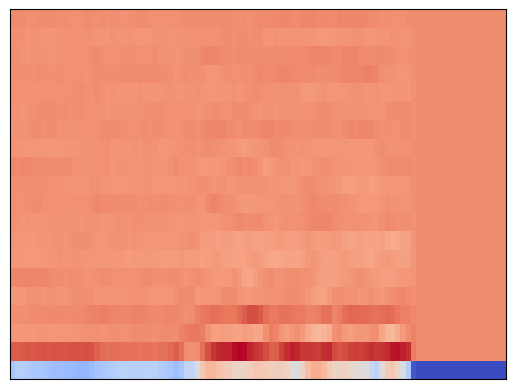

In [15]:
mfcc = librosa.feature.mfcc(
    y=audio,
    sr=sr,
    n_mfcc=20,
)
librosa.display.specshow(mfcc)
Audio(audio, rate=sr)

In [16]:
# def get_data(data_path, df_path, required_cols=['FileName', 'Stutter']):
#     info_df = pd.read_csv(df_path, index_col=0)
#     info_df = info_df.set_index("SEP28k-D")[required_cols]
#     required_cols.remove("FileName")

#     full_data = []
#     for stage in :
#         data = {"MelSpectrogram": []}

#         stage_df = info_df.loc[stage].set_index("FileName")

#         for column_name in required_cols:
#             data[column_name] = []

#         for file_name, info in stage_df.iterrows():
#             audio_path = os.path.join(data_path, file_name)

#             if file_name.split(".")[-1] not in ACCEPTED_FORMATS:
#                 continue

#             try:
#                 audio, _ = librosa.load(audio_path, sr=SAMPLE_RATE, duration=DURATION)
#             except Exception as e:
#                 print(f"\t[-] Audio {file_name} is invalid!")

#             if audio.size < 2*SAMPLE_RATE:
#                 continue
#             elif audio.size < DURATION*SAMPLE_RATE:
#                 pad_size = DURATION*SAMPLE_RATE - audio.size
#                 audio = np.pad(audio, pad_width=(0, pad_size))

#             melspec = librosa.feature.melspectrogram(
#                 y=audio,
#                 sr=SAMPLE_RATE,
#                 n_fft=N_FFT,
#                 hop_length=HOP_LENGTH
#             )
#             melspec = librosa.power_to_db(melspec)[:, :, np.newaxis]
#             data["MelSpectrogram"].append(melspec)
#             for column_name in required_cols:
#                 data[column_name].append(info[column_name])

#         full_data.append(data)
#     return full_data

In [17]:
# def get_data(data_path, df_path, k_fold_no=1, required_cols=['NoStutter']):
#     info_df = pd.read_csv(df_path, index_col=0)
#     info_df = info_df.set_index("FileName")
#     info_df = info_df[required_cols+[f"KFold{k_fold_no}"]]
#     full_data = []
#     for stage in range(1, -1, -1):
#         stage_df = info_df[info_df[f"KFold{k_fold_no}"] == stage]
#         stage_df = stage_df.drop(columns=f"KFold{k_fold_no}")
#         data = {}
#         data["MelSpectrogram"] = []
#         for column in required_cols:
#             data[column] = []

#         for file_name, info in stage_df.iterrows():
#             audio_path = os.path.join(data_path, file_name)
#             if file_name.split(".")[-1] not in ACCEPTED_FORMATS:
#                 continue

#             try:
#                 audio, _ = librosa.load(audio_path, sr=SAMPLE_RATE, duration=DURATION)
#             except Exception as e:
#                 print(f"\t[-] Audio {file_name} is invalid!")
#                 continue
#             if audio.size < 2*SAMPLE_RATE:
#                 continue
#             elif audio.size < DURATION*SAMPLE_RATE:
#                 pad_size = DURATION*SAMPLE_RATE - audio.size
#                 audio = np.pad(audio, pad_width=(0, pad_size))
#             elif audio.size > DURATION*SAMPLE_RATE:
#                 audio = audio[:DURATION*SAMPLE_RATE]

#             melspec = librosa.feature.melspectrogram(
#                 y=audio,
#                 sr=SAMPLE_RATE,
#                 n_fft=N_FFT,
#                 hop_length=HOP_LENGTH
#             )
#             melspec = librosa.power_to_db(melspec)[:, :, np.newaxis]
#             data["MelSpectrogram"].append(melspec)
#             for column_name in required_cols:
#                 data[column_name].append(info[column_name])
#         full_data.append(data)
#     return full_data

In [18]:
# def create_mel_spec_images(source_audio_path, info_df, dest_img_path, column_name):
#     info_df = info_df.set_index("FileName")
#     for file_name, info in info_df.iterrows():

#         save_file_name = file_name.split(".")[0]
#         if info[column_name]:
#             save_file_name += "_positive"
#         else:
#             save_file_name += "_negative"


#         audio_path = os.path.join(source_audio_path, file_name)
#         if file_name.split(".")[-1] not in ACCEPTED_FORMATS:
#             continue
#         try:
#             audio, _ = librosa.load(audio_path, sr=SAMPLE_RATE, duration=DURATION)
#         except Exception as e:
#             print(f"\t[-] Audio {file_name} is invalid!")
#         if audio.size < 2*SAMPLE_RATE:
#             continue
#         elif audio.size < DURATION*SAMPLE_RATE:
#             pad_size = DURATION*SAMPLE_RATE - audio.size
#             audio = np.pad(audio, pad_width=(0, pad_size))
#         melspec = librosa.feature.melspectrogram(
#             y=audio,
#             sr=SAMPLE_RATE,
#             n_fft=N_FFT,
#             hop_length=HOP_LENGTH,
#             n_mels=N_MELS
#         )
#         melspec = librosa.power_to_db(melspec, ref=np.max)
#         librosa.display.specshow(melspec, sr=SAMPLE_RATE)
#         plt.savefig(os.path.join(dest_img_path, save_file_name + ".jpg"), bbox_inches='tight', pad_inches=0)
#         plt.close()


In [19]:
def create_mel_spec_images(source_audio_path, info_df, dest_img_path, column_name):
    if not os.path.exists(dest_img_path):
        os.mkdir(dest_img_path)
    if not os.path.exists(os.path.join(dest_img_path, "1")):
        os.mkdir(os.path.join(dest_img_path, "1"))
    if not os.path.exists(os.path.join(dest_img_path, "0")):
        os.mkdir(os.path.join(dest_img_path, "0"))

    info_df = info_df.set_index("FileName")
    for file_name, info in info_df.iterrows():

        save_file_name = file_name.split(".")[0]
        if info[column_name]:
            folder_name = "0"
        else:
            folder_name = "1"


        audio_path = os.path.join(source_audio_path, file_name)
        if file_name.split(".")[-1] not in ACCEPTED_FORMATS:
            continue
        try:
            audio, _ = librosa.load(audio_path, sr=SAMPLE_RATE, duration=DURATION)
        except Exception as e:
            print(f"\t[-] Audio {file_name} is invalid!")
        if audio.size < 2*SAMPLE_RATE:
            continue
        elif audio.size < DURATION*SAMPLE_RATE:
            pad_size = DURATION*SAMPLE_RATE - audio.size
            audio = np.pad(audio, pad_width=(0, pad_size))
        melspec = librosa.feature.melspectrogram(
            y=audio,
            sr=SAMPLE_RATE,
            n_fft=N_FFT,
            hop_length=HOP_LENGTH,
            n_mels=N_MELS
        )
        melspec = librosa.power_to_db(melspec, ref=np.max)
        
        plt.figure(figsize=(3, 3))
        librosa.display.specshow(melspec, sr=SAMPLE_RATE, y_axis="mel", x_axis="time")
        plt.axis(False)
        plt.savefig(os.path.join(dest_img_path, folder_name, save_file_name + ".jpg"), bbox_inches='tight', pad_inches=0)
        plt.close()

In [20]:
dest_path = r"E:\Desktop\StutterDetModel\Tensorflow_models\test_spec_img"

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dest_path,
    labels="inferred",
    label_mode="int",
    class_names=["0", "1"],
    image_size=(128, 128),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

NameError: name 'SEED' is not defined

In [102]:
plt.imshow(next(train_data.as_numpy_iterator())[0][0]/255.0)

In [21]:
df = pd.read_csv(r"E:\Desktop\StutterDetModel\data\SEP28K.csv")
df.head()

,Unnamed: 0,SEP12k,SEP28k-E,SEP28k-T,SEP28k-D,Prolongation,Block,Interjection,FileName,Stutter,Repetition
0,0,NaN,train,test,test,0.0,0.0,0.0,HeStutters_0_0.wav,0.0,0.0
1,1,NaN,train,test,test,0.0,0.0,0.0,HeStutters_0_1.wav,0.0,0.0
2,2,NaN,train,test,test,0.0,0.0,0.0,HeStutters_0_2.wav,0.0,0.0
3,3,NaN,train,test,test,0.0,0.0,0.0,HeStutters_0_3.wav,0.0,0.0
4,4,NaN,train,test,test,0.0,0.0,0.0,HeStutters_0_4.wav,0.0,0.0


In [22]:
sample_df = df.sample(10)
sample_df

,Unnamed: 0,SEP12k,SEP28k-E,SEP28k-T,SEP28k-D,Prolongation,Block,Interjection,FileName,Stutter,Repetition
10913,11181,train,test,train,dev,0.0,0.0,0.0,StutterTalk_22_24.wav,1.0,1.0
6668,6877,NaN,train,test,test,0.0,0.0,0.0,MyStutteringLife_30_93.wav,0.0,0.0
10908,11176,train,test,train,dev,1.0,0.0,1.0,StutterTalk_22_19.wav,1.0,1.0
14484,14814,train,test,train,dev,1.0,0.0,0.0,StutterTalk_77_13.wav,1.0,1.0
7895,8123,train,test,train,dev,1.0,0.0,0.0,StrongVoices_7_39.wav,1.0,0.0
9462,9714,train,test,train,dev,0.0,0.0,0.0,StrongVoices_32_60.wav,0.0,0.0
24675,25391,train,test,train,dev,0.0,0.0,1.0,WomenWhoStutter_76_32.wav,1.0,1.0
13551,13864,train,test,train,dev,0.0,0.0,0.0,StutterTalk_64_90.wav,0.0,0.0
12297,12590,NaN,train,test,test,0.0,1.0,1.0,StutterTalk_42_13.wav,0.0,0.0
14205,14530,train,test,train,dev,0.0,0.0,0.0,StutterTalk_72_90.wav,0.0,0.0


In [89]:
create_mel_spec_images(
    r"E:\Desktop\StutterDetModel\data\clips\stuttering-clips\clips",
    sample_df,
    r"E:\Desktop\StutterDetModel\Tensorflow_models\test_spec_img",
    "Repetition")

In [92]:
path = r"E:\Desktop\StutterDetModel\Tensorflow_models\test_spec_img\1\StutteringIsCool_34_93.jpg"
image = plt.imread(path)
print(image.shape)
plt.imshow(image)
plt.axis(False)
plt.show()

(231, 232, 3)


In [16]:
# required_cols = [ 'Prolongation', 'Block', 'Interjection', 'Repetition', 'NoStutter']

# for i in range(1, 6):
#     if os.path.exists(rf"E:\Desktop\StutterDetModel\Tensorflow_models\saved_data\kfold{i}.pkl"):
#         with open(rf"E:\Desktop\StutterDetModel\Tensorflow_models\saved_data\kfold{i}.pkl", "rb") as f:
#             data = pickle.load(f)
#     else:
#         data = get_data(
#             os.path.join(DATA_PATH, "clips/stuttering-clips/clips"), 
#             os.path.join(DATA_PATH, "KFold_dataset.csv"),
#             k_fold_no=i,
#             required_cols=required_cols
#         )
#         with open(rf"E:\Desktop\StutterDetModel\Tensorflow_models\saved_data\kfold{i}.pkl", "wb") as f:
#             pickle.dump(data, f)
#     del data
#     print("Finished: ", rf"E:\Desktop\StutterDetModel\Tensorflow_models\saved_data\kfold{i}.pkl")

In [9]:
with open(rf"E:\Desktop\StutterDetModel\Tensorflow_models\saved_data\kfold{1}.pkl", "rb") as f:
    train, val = pickle.load(f)

(127, 99, 3)


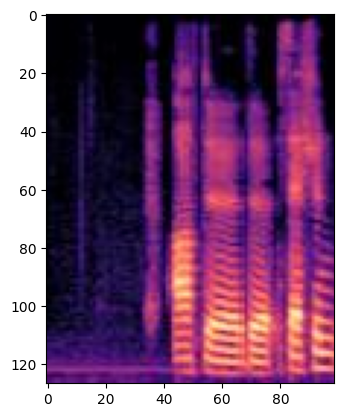

In [10]:
train_melspec = np.array(train["MelSpectrogram"])
mel_spec_mean = train_melspec.mean()
mel_spec_std = train_melspec.std()
print(mel_spec_mean, mel_spec_std, train_melspec.min(), train_melspec.max())

-42.745132 16.253246 -100.0 26.269497


In [11]:
val_melspec = np.array(val["MelSpectrogram"])

In [12]:
del train["MelSpectrogram"], val["MelSpectrogram"]

In [13]:
# Standardize the mel spectrograms

train_melspec = (train_melspec - mel_spec_mean) / mel_spec_std
val_melspec = (val_melspec - mel_spec_mean) / mel_spec_std

In [14]:
val_melspec.min(), val_melspec.max()

(-3.4893186, 4.280194)

In [15]:
label = np.array(train["NoStutter"])
num_pos = label.sum()
num_neg = len(label) - num_pos
alpha_val = num_neg / num_pos
print(num_pos, num_neg)
alpha_val

1720.0 2254.0


1.3104651162790697

In [16]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_melspec,
     np.expand_dims(np.array(train["NoStutter"]), axis=-1))
)
val_ds = tf.data.Dataset.from_tensor_slices(
    (val_melspec,
     np.expand_dims(np.array(val["NoStutter"]), axis=-1))
)

In [17]:
del train, val

In [18]:
train_ds = train_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [25]:
def build_model(input_shape=(128, 188, 1), dropout_rate=0.5):
    inp = layers.Input((128, 188, 1))

    x = layers.Conv2D(
        32, 
        kernel_size=(3, 3), 
        padding="same",
        activation="relu"
    ) (inp)
    x = layers.Conv2D(
        32, 
        kernel_size=(3, 3), 
        padding="same",
        activation="relu"
    ) (x)
    x = layers.MaxPool2D((2, 2)) (x)
    x = layers.BatchNormalization() (x)

    x = layers.Conv2D(
        64, 
        kernel_size=(3, 3), 
        padding="same",
        activation="relu"
    ) (x)
    x = layers.Conv2D(
        64, 
        kernel_size=(3, 3), 
        padding="same",
        activation="relu"
    ) (x)
    x = layers.MaxPool2D((2, 2)) (x)
    x = layers.BatchNormalization() (x)

    x = layers.Conv2D(
        128, 
        kernel_size=(3, 3), 
        padding="same",
        activation="relu"
    ) (x)
    x = layers.Conv2D(
        128, 
        kernel_size=(3, 3), 
        padding="same",
        activation="relu"
    ) (x)
    x = layers.MaxPool2D((2, 2)) (x)
    x = layers.BatchNormalization() (x)

    x = layers.TimeDistributed(layers.Flatten()) (x)
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
    x = layers.Attention() ([x, x])
    x = layers.Flatten() (x)

    x = layers.Dense(
        512,
        activation="relu"
    ) (x)
    x = layers.Dropout(dropout_rate) (x)
    x = layers.Dense(
        128,
        activation="relu"
    ) (x)
    x = layers.Dropout(dropout_rate) (x)
    out = layers.Dense(1) (x)

    model = Model(inp, out)

    return model

model = build_model()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 188, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 128, 188, 32  320         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_13 (Conv2D)             (None, 128, 188, 32  9248        ['conv2d_12[0][0]']              
                                )                                                           

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=1e-3,
    ),
    loss=tf.keras.losses.BinaryCrossentropy(
        from_logits=True
    ),
    metrics=[metrics.BinaryAccuracy(), metrics.Precision(), metrics.Recall()]
)

In [27]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    callbacks=[
        callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1, restore_best_weights=True)
    ],
    validation_data=val_ds,
    shuffle=True,
).history

Epoch 1/100


497/497 [==============================] - 42s 71ms/step - loss: 0.7201 - binary_accuracy: 0.5732 - precision_2: 0.5135 - recall_2: 0.2645 - val_loss: 0.6994 - val_binary_accuracy: 0.5624 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/100
497/497 [==============================] - 36s 72ms/step - loss: 0.6493 - binary_accuracy: 0.5750 - precision_2: 0.5508 - recall_2: 0.0977 - val_loss: 0.7605 - val_binary_accuracy: 0.5624 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/100
497/497 [==============================] - 36s 72ms/step - loss: 0.6252 - binary_accuracy: 0.5722 - precision_2: 0.5373 - recall_2: 0.0837 - val_loss: 0.6131 - val_binary_accuracy: 0.5624 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/100
497/497 [==============================] - 36s 73ms/step - loss: 0.6190 - binary_accuracy: 0.5861 - precision_2: 0.6307 - recall_2: 0.1052 - val_loss: 0.6710 - val_binary_accuracy: 0.5624 - val_precision_2: 0.0000e+00 - val_recal

KeyboardInterrupt: 

In [87]:
model.evaluate(val_ds)

31/31 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - binary_accuracy: 0.4399 - f1_score: 0.6108 - loss: 3.2058 - precision_5: 0.4399 - recall_5: 1.0000


[3.2045199871063232,
 0.4375634491443634,
 0.6087570190429688,
 0.4375634491443634,
 1.0]

In [ ]:
import matplotlib.pyplot as plt

plt.title("Loss graph")
plt.plot(history["loss"], label="train")
plt.plot(history["val_loss"], label="validation")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
inps, outs = next(test_ds.as_numpy_iterator())

In [ ]:
inp1, out1 = inps[0], outs[0]

In [ ]:
np.round(model(inps).numpy().reshape(-1)).astype(np.int32)

In [ ]:
outs.astype(np.int32)

1.0    2138
2.0    1946
0.0    1383
3.0     758
4.0      95
Name: Stutter, dtype: int64

In [7]:
import pathlib

In [32]:
def create_mel_spec_images(source_audio_path, info_df, dest_img_path):
    if not os.path.exists(dest_img_path):
        os.mkdir(dest_img_path)

    info_df = info_df.set_index("FileName")
    for file_name, _ in info_df.iterrows():

        save_file_name = file_name.split(".")[0]

        audio_path = os.path.join(source_audio_path, pathlib.Path(file_name))
        if file_name.split(".")[-1] not in ACCEPTED_FORMATS:
            continue
        try:
            audio, _ = librosa.load(audio_path, sr=SAMPLE_RATE, duration=DURATION)
        except Exception as e:
            print(f"\t[-] Audio {file_name} is invalid!")
            continue
        if audio.size < DURATION*SAMPLE_RATE:
            pad_size = DURATION*SAMPLE_RATE - audio.size
            audio = np.pad(audio, pad_width=(0, pad_size))
        melspec = librosa.feature.melspectrogram(
            y=audio,
            sr=SAMPLE_RATE,
            n_fft=N_FFT,
            hop_length=HOP_LENGTH,
            n_mels=N_MELS
        )
        melspec = librosa.power_to_db(melspec, ref=np.max)
        
        plt.figure(figsize=(2, 2))
        librosa.display.specshow(melspec, sr=SAMPLE_RATE, y_axis="mel", x_axis="time")
        plt.axis(False)
        plt.savefig(
            os.path.join(dest_img_path, pathlib.Path(save_file_name + ".jpg")), 
            bbox_inches='tight', 
            pad_inches=0
        )
        plt.close()

In [33]:

IMG_DATA_PATH = pathlib.Path("E:/Desktop/StutterDetModel/Tensorflow_models/test_spec_img")
create_mel_spec_images(
    os.path.join(DATA_PATH,pathlib.Path("clips/stuttering-clips/clips")),
    sample_df[:1],
    IMG_DATA_PATH
)